<a href="https://colab.research.google.com/github/sugimotoh/seminar2018/blob/master/KAWANO20190705.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install below packages for web scraping.**

*   selenium
*   beautifulsoup4


In [12]:
pip install selenium

In [13]:
pip install beautifulsoup4

**Install below package for web access.**

*  requests


In [14]:
pip install requests

**web access and web scraping.**
*   Importing packege requests and use bs4 in BeautifulSoup.
*   texts of p tags can be drown specified url
*   url is specified by BeautifulSoup.
*   texts in url are specified by requests.get.
*   you can omit "print", that is raw data.

In [0]:
import requests
from bs4 import BeautifulSoup
 
r = requests.get("https://www.mwed.jp/hall/11063/rev/1416972/")
soup = BeautifulSoup(r.content, "html.parser")
#print(soup.find_all("p"))

**Install below package for web access.**
*   janome



In [18]:
pip install janome

**it's better to install FONT for avoiding garble**

In [19]:
!ls /usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf

/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf


In [20]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


**prerocessing**

*   contert to stiring by using str
*   remove garbages by using replece
*   generate our data as str_data01

In [21]:
data00 = soup.find_all("p")
str_data00 = str(data00)
str_data01 = str_data00.replace('</p>,', "").replace('\n', "").replace('[<p class="clrS fontSS pd10b">', "").replace('<p>ホテルニューオータニ博多　ブライダルスタッフ より</p>,', "").replace('b fontL あなたの疑問は解決しましたか？ わからない事があればこの式場に決めた先輩花嫁・花婿に相談してみましょう/', "").replace('class', "").replace('fltL', "").replace('fontS', "").replace('mg10t', "").replace('mg10b', "").replace('taC', "").replace('結婚式、披露宴を福岡で考えているお二人へ。「ホテルニューオータニ博多」は、福岡市エリアのホテルです。挙式や外観、会場内の写真から式場の雰囲気をつかんだら、先輩カップルが投稿した実際の費用と料金プランを見比べたり、結婚式場口コミで料理やスタッフ、進行演出、衣装や施設の評価をチェック。気になったら、ブライダルフェア・見学予約をして式場訪問してみましょう。', "").replace('ホテルニューオータニ博多', "").replace('あなたの疑問は解決しましたか？ わからない事があればこの式場に決めた先輩花嫁・花婿に相談してみましょう', "").replace('「', "").replace('」', "").replace('。', "").replace('、', "").replace('<', "").replace('>', "").replace('p', "").replace('=', "").replace('"', "")
str_data01

' コスパがあまり良くないように感じましたbr老舗ホテルなので仕方ない部分はあるかと思いますがサービスや施設面その他総合的に考えると高いと思います/br チャペルはﾎﾃﾙにしては安っぽく見え好みではありませんでしたbr披露宴会場はホテルといった感じで落ち着いた雰囲気ですbr/ウェルカムスペースが広いと案内されましたが広さに対して座るスペースがあまりないことが気になりました/br あまりご紹介は頂けませんでした ホテル内に衣装店が併設されているようです 味はとても美味しかったですbr/ケーキを選べるのはワクワクしましたbr/ただお料理重視とお伝えしていたのにあまり説明がなかったことと試食の内容がいくらの金額のメニューなのか分からず見積りからどのくらいプラスになるのかは心配なところです 可もなく不可もなくですbr/ブライダルサロンの場所が分からずサロン前にたどり着けても入口前でスタッフさんお二人が割と大きな声で楽しそうにお話しされていてこちらからお声掛けするまで気づいていただけないのは気になりましたbr/ゲストハウスではなくてホテルなので期待してしまっていた分スタッフさんが気になります 薬院駅を降りてまっすぐ行くのでわかりやすいと思います この口コミは役に立ちましたか？ ブライダルサロン より （返信日：2019年6月25日）  mg15bしのxj 様  mg15bこの度はをご検討いただき誠にありがとうございますbr/またへ口コミ投稿いただきましてありがとうございます  mg15bチャペル費用コストパフォーマンスにつきましては満足感にかけた点もあったとのことで申し訳ございませんでした  mg15bまたご来館いただいた際にbr/おふたりを不安なお気持ちにさせてしまい申し訳ございませんでした br/しのxj様の貴重なお言葉を参考にさせていただきbr/今後もみなさまにお喜びいただけるサービスを目指して参ります  mg15b今後ともをご愛顧いただけますよう宜しくお願い申し上げます  b fontL あなたの疑問は解決しましたか？ わからない事があればこの式場に決めた先輩花嫁・花婿に相談してみましょう     100名で328万円でした内容的にはしっかりとライブエンドロールやプロフィールビデオ記念撮影２冊などが含まれているただし当日成約特典が40万円含まれていたので実際は370万

**define tokenizer and data for analysis**

In [0]:
from janome.tokenizer import Tokenizer
tok = Tokenizer()
tokens = tok.tokenize(str_data01)

select use words and avoiding words

In [0]:
words = ""
for token in tokens:
    if token.part_of_speech.split(',')[0] in ['名詞', '動詞', '形容詞', '副詞']:
        words = words + " " + token.base_form

stop_words = [u'する', u'ある', u'こと', u'いる', u'れる', u'思う', u'いただく', u'くださる'
             ,u'なる',u'よう', u'やる', u'もの', u'lace', u'つく', u'Ｔステ']
fpath = "/Library/Fonts/ヒラギノ角ゴ Pro W3.otf"

**wordcloud**

In [25]:
from wordcloud import WordCloud
#path = '-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd'　
wordcloud = WordCloud(font_path='ipagp.ttf', 
                      background_color="white"
                      ,width=1400
                      ,height=800
                      ,stopwords=set(stop_words)).generate(words)
wordcloud.to_file("./wordcloud_sample.png")

**plot**

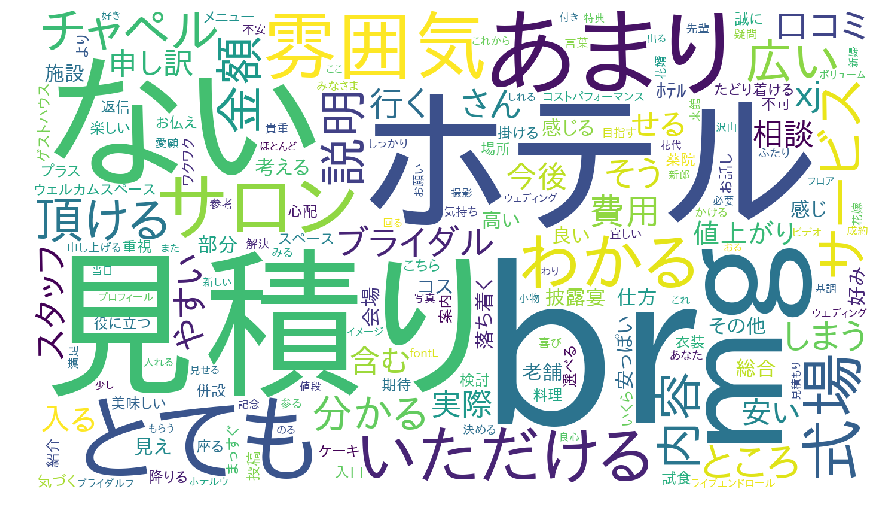

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()